# <center> <font color = darkblue> **SI618 FINAL PROJECT CODE BOOK** </font> </center>

### <font color = darkred> ***Libraries*** </font>

In [203]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from collections import Counter
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
import itertools
from wordcloud import WordCloud
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy as sp
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.ensemble as skens
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as skmetric
from sklearn.metrics import accuracy_score, classification_report
import sklearn.naive_bayes as sknb
import sklearn.tree as sktree
sns.set(style='white', color_codes=True, font_scale=1.3)
import sklearn.externals.six as sksix
import IPython.display as ipd
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import os
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
warnings.filterwarnings('ignore')
os.environ["PATH"] += os.pathsep + r'C:\Users\tabas\Anaconda3\pkgs\graphviz-2.38-hfd603c8_2\Library\bin\graphviz'
from pdpbox import pdp, info_plots 
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import itertools
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn import metrics

### <font color = orange> **LOAD DATA** </font>

In [218]:
heart_data = pd.read_csv("heart.csv")
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### <font color = orange> **PREPARE DATA** </font>

In [219]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [220]:
heart_data.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [207]:
heart_data['age_group'] =''
heart_data.loc[heart_data['age'].between(21, 30, inclusive = True), 'age_group'] = "21-30"
heart_data.loc[heart_data['age'].between(31, 40, inclusive = True), 'age_group'] = "31-40"
heart_data.loc[heart_data['age'].between(41, 50, inclusive = True), 'age_group'] = "41-50"
heart_data.loc[heart_data['age'].between(51, 60, inclusive = True), 'age_group'] = "51-60"
heart_data.loc[heart_data['age'].between(61, 70, inclusive = True), 'age_group'] = "61-70"
heart_data.loc[heart_data['age'].between(71, 80, inclusive = True), 'age_group'] = "71-80"
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,61-70
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,31-40
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,41-50
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,51-60
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,51-60


In [208]:
heart_data['heart_disease'] = ""
heart_data.loc[heart_data['target'] == 1, 'heart_disease'] = "yes"
heart_data.loc[heart_data['target'] == 0, 'heart_disease'] = "no"
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,61-70,yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,31-40,yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,41-50,yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,51-60,yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,51-60,yes


In [209]:
heart_data['gender'] = ""
heart_data.loc[heart_data['sex'] == 1, 'gender'] = "male"
heart_data.loc[heart_data['sex'] == 0, 'gender'] = "female"
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,heart_disease,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,61-70,yes,male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,31-40,yes,male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,41-50,yes,female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,51-60,yes,male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,51-60,yes,female


In [210]:
heart_data['fbs_greater_120'] = ""
heart_data.loc[heart_data['fbs'] == 1, 'fbs_greater_120'] = "true"
heart_data.loc[heart_data['fbs'] == 0, 'fbs_greater_120'] = "false"
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,heart_disease,gender,fbs_greater_120
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,61-70,yes,male,true
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,31-40,yes,male,false
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,41-50,yes,female,false
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,51-60,yes,male,false
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,51-60,yes,female,false


### <font color = orange> QUESTION1.  *Are heart diseases gender specific and/or age specific? How many clusters do you think                                          there are in the dataframe for that obtained gender in the obtained age range?* </font>

In [12]:
df_gen_heart = heart_data[[ "gender", "heart_disease"]]
df_gen_heart.head()

,gender,heart_disease
0,male,yes
1,male,yes
2,female,yes
3,male,yes
4,female,yes


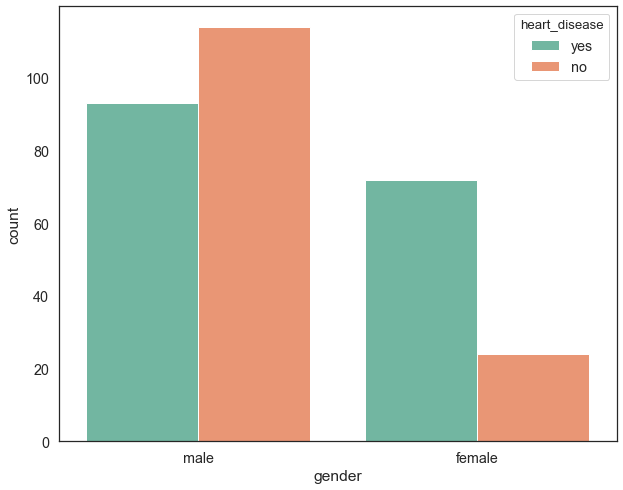

In [13]:
plt.figure(figsize = (10,8))
sns.countplot(x="gender", hue="heart_disease",palette="Set2", data=df_gen_heart)

In [14]:
df_age_heart = heart_data[["age_group", "heart_disease"]]
df_age_heart.head()

,age_group,heart_disease
0,61-70,yes
1,31-40,yes
2,41-50,yes
3,51-60,yes
4,51-60,yes


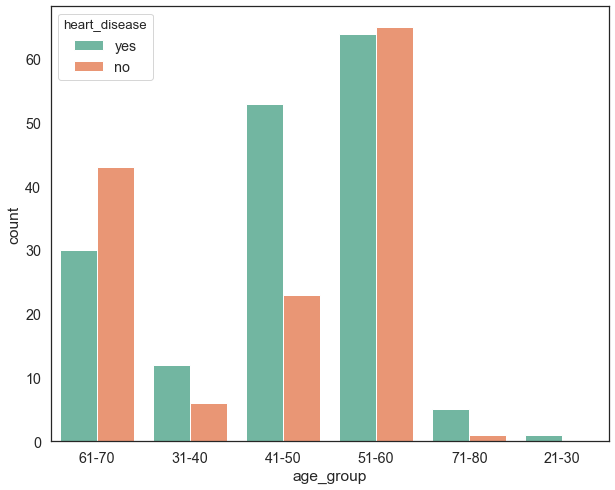

In [15]:
plt.figure(figsize = (10,8))
sns.countplot(x="age_group", hue="heart_disease", palette = "Set2", data=df_age_heart)

In [16]:
df_gen_age = heart_data[["gender", "heart_disease", "age"]]
df_gen_age.head()

,gender,heart_disease,age
0,male,yes,63
1,male,yes,37
2,female,yes,41
3,male,yes,56
4,female,yes,57


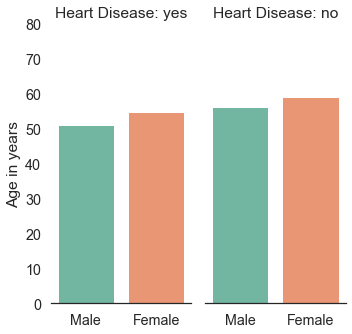

In [17]:
gen_age_cat = sns.catplot(x="gender", y="age", col="heart_disease",data= df_gen_age,kind="bar", ci=None, aspect= 0.5, palette="Set2")
(gen_age_cat.set_axis_labels("", "Age in years").set_xticklabels(["Male", "Female"]).set_titles("Heart Disease: {col_name}").set(ylim=(0, 80)).despine(left=True))

In [18]:
df_heart_copy = heart_data.copy() 

In [19]:
df_heart_clusters_temp1 = df_heart_copy[df_heart_copy.age_group == "51-60"]
df_heart_clusters_temp = df_heart_clusters_temp1[df_heart_clusters_temp1.gender == "female"]
df_heart_clusters = df_heart_clusters_temp.drop(columns = ['age_group', 'heart_disease','gender', 'fbs_greater_120'])
df_heart_clusters.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1


In [20]:
#618 clustering in-class notebook
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [21]:
np.sqrt(len(df_heart_clusters)/2) #rule of thumb

4.183300132670378

In [22]:
model = AgglomerativeClustering(n_clusters=4) # we can make up the value for clusters
model.fit_predict(df_heart_clusters)
df_heart_clusters['cluster'] = model.labels_
print(model.labels_)

[2 0 0 2 0 0 1 3 1 1 0 1 2 3 1 0 1 1 1 3 0 1 3 2 0 1 0 1 2 0 0 3 1 1 1]


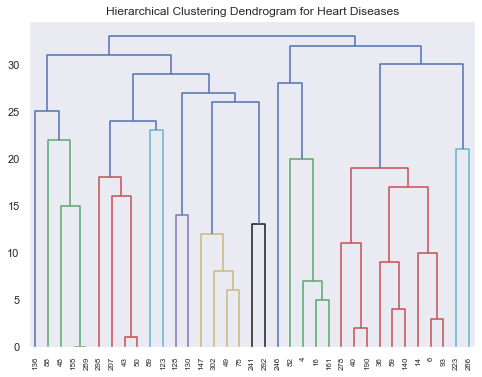

In [197]:
plt.figure(figsize=(8, 6))
plt.title('Hierarchical Clustering Dendrogram for Heart Diseases')
plot_dendrogram(model,labels=df_heart_clusters.index.values)
plt.xticks(rotation=90)
plt.savefig('heart_dendogram).pdf',format='pdf')

plt.show()

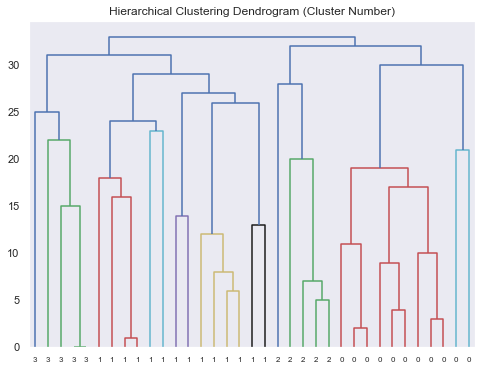

In [198]:
plt.figure(figsize=(8, 6))
plt.title('Hierarchical Clustering Dendrogram (Cluster Number)')
plot_dendrogram(model,labels=model.labels_)
plt.xticks(rotation=0)
plt.show()

In [25]:
kmeans = KMeans(n_clusters=4) # move to 4 clusters
kmeans.fit(df_heart_clusters)
print("Labels:")
print(kmeans.labels_)

Labels:
[1 3 3 1 3 3 2 0 2 2 3 2 1 0 2 3 2 0 0 0 3 2 0 1 3 2 3 2 1 3 3 0 2 2 2]


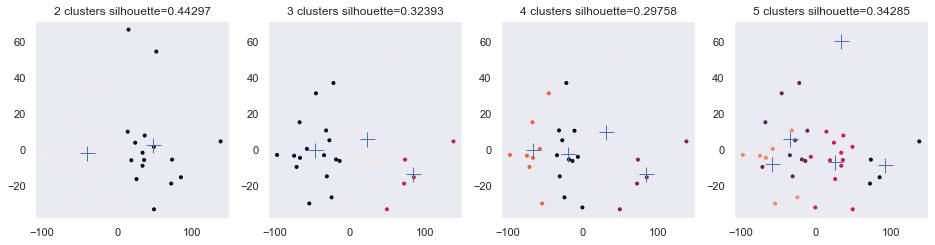

In [199]:
pca = PCA(n_components=2).fit(df_heart_clusters)
heart_disease_df = pca.transform(df_heart_clusters)

plt.figure(figsize=(16, 8))
scores, n_clusters, preds = [], [], []
for i in range(2, 6):
    kmean = KMeans(n_clusters = i).fit(df_heart_clusters)
    scores.append(kmean.score(df_heart_clusters))
    n_clusters.append(i)
    pred = kmean.predict(df_heart_clusters)
    preds.append(pred)
    plt.subplot(2, 4, i - 1)
    plt.title(f"{i} clusters silhouette={np.round(silhouette_score(df_heart_clusters, pred), decimals=5)}")
    plt.scatter(heart_disease_df[:, 0], heart_disease_df[:, 1], c=pred, marker = '.')
    
    heart_disease_centroids = kmean.cluster_centers_
    heart_disease_centroids2d = pca.transform(heart_disease_centroids)
    plt.plot(heart_disease_centroids2d[:, 0], heart_disease_centroids2d[:, 1], 'b+', markersize=15)

(1.0, 8.3)

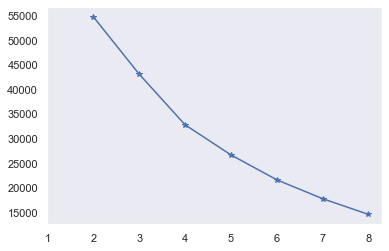

In [200]:
#elbow method
heart = []
for k in range(2,9):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(df_heart_clusters)
    heart.append(k_means.inertia_)

fig, ax = plt.subplots()
plt.plot(range(2,9), heart, 'b*-')
plt.xlim(1, plt.xlim()[1])

(1.0, 8.3)

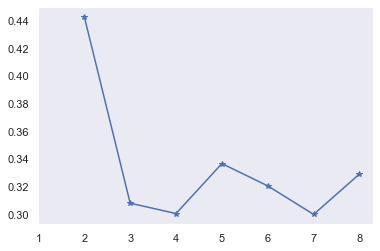

In [201]:
#silhouette method
heart = []
for k in range(2,9):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(df_heart_clusters)
    heart.append(metrics.silhouette_score(df_heart_clusters, k_means.labels_))

fig, ax = plt.subplots()
plt.plot(range(2,9), heart, 'b*-')
plt.xlim(1, plt.xlim()[1])

### <font color = orange> QUESTION2.  *Which variable/variables show strong relationships to the having a heart disease?* </font>

In [29]:
heart_relation = heart_data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']]

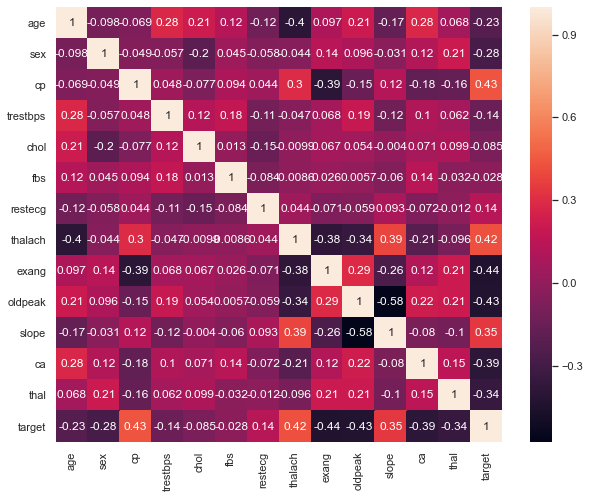

In [202]:
heart_corr = heart_relation.corr()
plt.figure(figsize = (10,8))
sns.heatmap(heart_corr, annot = True)

From the above heatmap, we can observe that the correlation coefficients of cp(chest pain) and target(heart disease), thalach(maximum heart rate achieved) and target(heart disease), thalach(maximum heart rate achieved) and slope(slope of the ST segment of electrocadiograph during exercise) and slope(slope of the ST segment of electrocadiograph during exercise) and target(hear disease) are 0.43, 0.42, 0.39 and 0.35. This means that these variables are strongly related as compared to other correlations between the rest of the variables. Therefore, we understand that if an individual experiences chest pains of any kind, has a high heart rate and the slope the ST segment in the ECG are abrupt they're positive for having a heart disease.

In [31]:
#y~x, y represents outcome/dependent variable and x represents independent variable
target_cp_thalach_slope_ols = smf.ols('target ~ cp + thalach + slope', data = heart_relation).fit()
target_cp_thalach_slope_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     47.13
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           5.72e-25
Time:                        03:46:44   Log-Likelihood:                -160.05
No. Observations:                 303   AIC:                             328.1
Df Residuals:                     299   BIC:                             342.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6352      0.159     -3.990      0.000      -0.948      -0.322
cp             0.1631      0.024      6.765      0.000       0.116       0.211
thalach        0.0052      0.001      4.462      0.000       0.003       0.008
slope          0.1723      0.042      4.118      0.000       0.090       0.255
==============================================================================
Omnibus:                       11.376   Durbin-Watson:                   0.650
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.198
Skew:                          -0.226   Prob(JB):                       0.0273
Kurtosis:                       2.395   Cond. No.                     1.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
target_cp_thalach_slope_anova = sm.stats.anova_lm(target_cp_thalach_slope_ols, typ=3)
print(target_cp_thalach_slope_anova)

              sum_sq     df          F        PR(>F)
Intercept   2.717261    1.0  15.923659  8.301714e-05
cp          7.808490    1.0  45.759208  7.039027e-11
thalach     3.397245    1.0  19.908486  1.151704e-05
slope       2.893625    1.0  16.957183  4.952137e-05
Residual   51.022268  299.0        NaN           NaN


<Figure size 576x432 with 0 Axes>

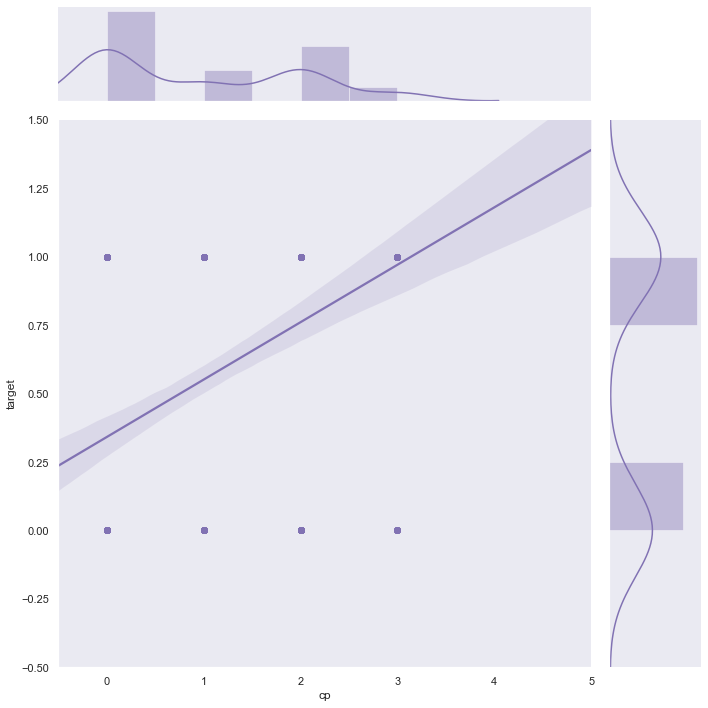

In [212]:
plt.figure(figsize = (8,6))
sns.set(style="dark")
graph1 = sns.jointplot("cp", "target", data= heart_relation,
                  kind="reg", truncate=False,
                  xlim=(-0.5, 5), ylim=(-0.5,1.5),
                  color="m", height=10)

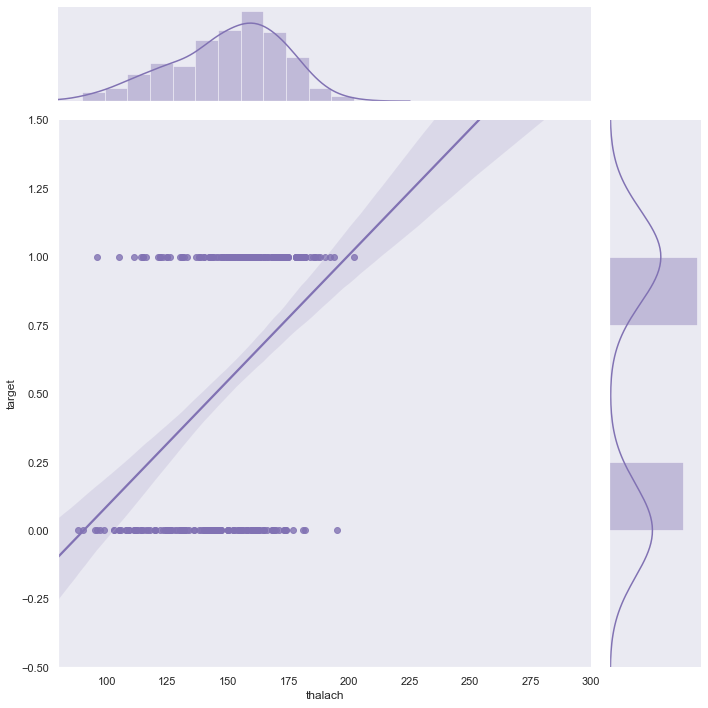

In [34]:
sns.set(style="dark")
graph1 = sns.jointplot("thalach", "target", data= heart_relation,
                  kind="reg", truncate=False,
                  xlim=(80,300), ylim=(-0.5,1.5),
                  color="m", height=10)

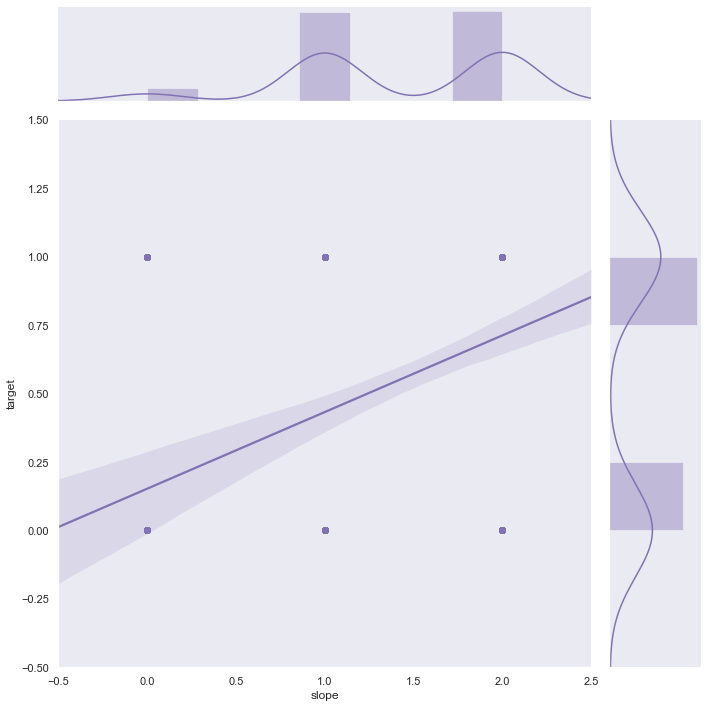

In [35]:
sns.set(style="dark")
graph1 = sns.jointplot("slope", "target", data= heart_relation,
                  kind="reg", truncate=False,
                  xlim=(-0.5,2.5 ), ylim=(-0.5,1.5),
                  color="m", height=10)

In [36]:
thalach_slope_ols = smf.ols('thalach ~ slope', data = heart_relation).fit()
thalach_slope_ols.summary()                                                             

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                thalach   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     52.95
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           2.99e-12
Time:                        03:46:50   Log-Likelihood:                -1353.7
No. Observations:                 303   AIC:                             2711.
Df Residuals:                     301   BIC:                             2719.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    129.5288      3.020     42.889      0.000     123.586     135.472
slope         14.3768      1.976      7.277      0.000      10.489      18.265
==============================================================================
Omnibus:                        9.167   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.157
Skew:                          -0.386   Prob(JB):                       0.0103
Kurtosis:                       3.358   Cond. No.                         5.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
thalach_slope_anova = sm.stats.anova_lm(thalach_slope_ols, typ=2)
print(thalach_slope_anova)                                               

                 sum_sq     df          F        PR(>F)
slope      23703.450247    1.0  52.951989  2.986482e-12
Residual  134739.764274  301.0        NaN           NaN


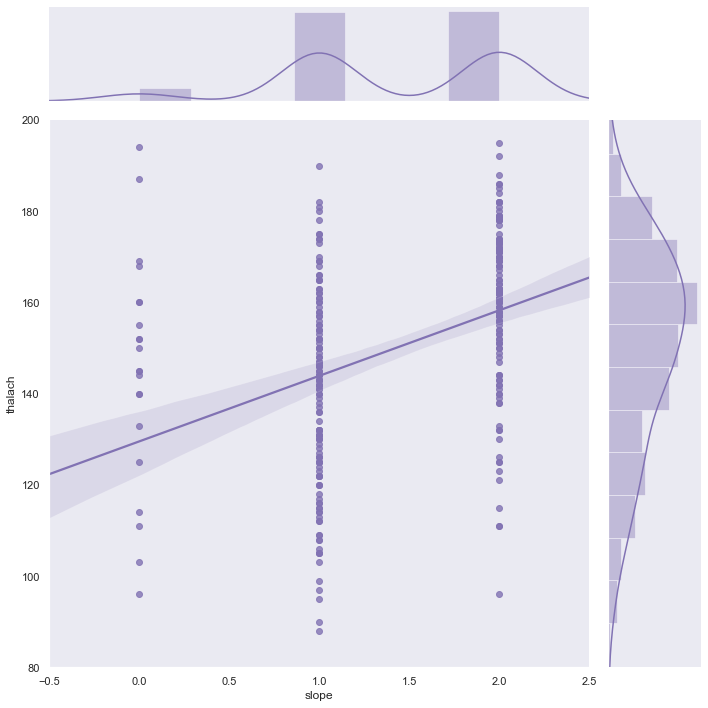

In [38]:
sns.set(style="dark")
graph1 = sns.jointplot("slope", "thalach", data= heart_relation,
                  kind="reg", truncate=False,
                  xlim=(-0.5,2.5 ), ylim=(80, 200),
                  color="m", height=10)

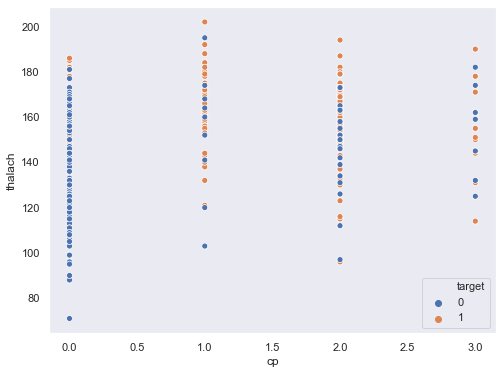

In [39]:
plt.figure(figsize = (8,6))
sns.scatterplot(x="cp", y="thalach",hue="target", data=heart_relation)

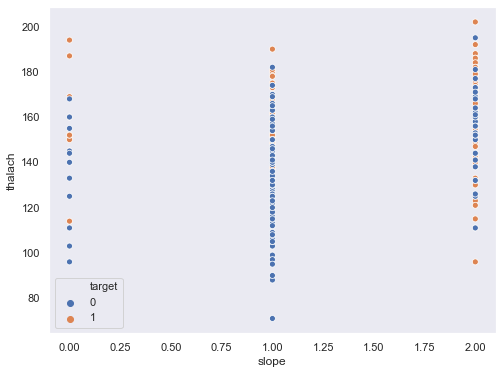

In [40]:
plt.figure(figsize = (8,6))
sns.scatterplot(x="slope", y="thalach",hue="target", data=heart_relation)

### <font color = orange> QUESTION3.  *How are the factors cp, trestbps, chol, restecg, exang related on the basis of categorical factors?* </font>

In [41]:
df_relation1 = heart_data[["fbs_greater_120", 'cp', 'trestbps', 'chol', 'restecg', 'exang']]
df_relation1.head()

,fbs_greater_120,cp,trestbps,chol,restecg,exang
0,true,3,145,233,0,0
1,false,2,130,250,1,0
2,false,1,130,204,0,0
3,false,1,120,236,1,0
4,false,0,120,354,1,1


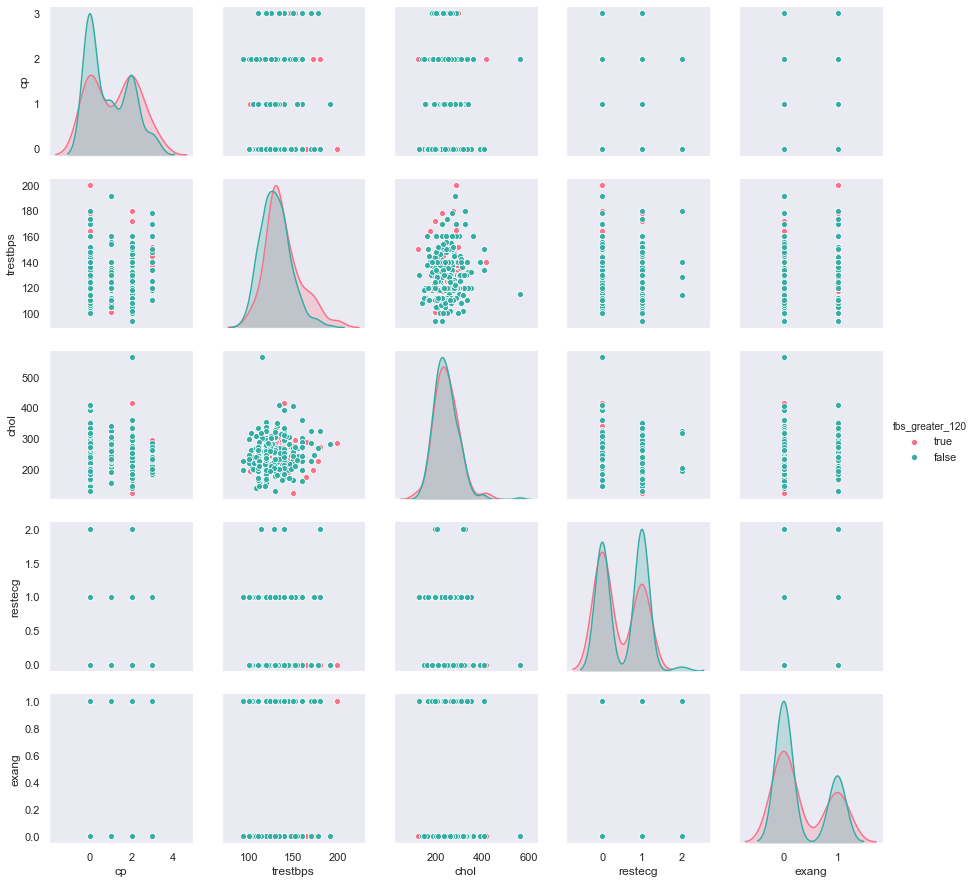

In [214]:
sns.pairplot(data = df_relation1 ,palette="husl", hue= "fbs_greater_120")
plt.savefig('rela1_pp.png',format='png')
plt.show()

In [43]:
df_relation2 = heart_data[["age_group", 'cp', 'trestbps', 'chol', 'restecg', 'exang']]
df_relation2.head()

,age_group,cp,trestbps,chol,restecg,exang
0,61-70,3,145,233,0,0
1,31-40,2,130,250,1,0
2,41-50,1,130,204,0,0
3,51-60,1,120,236,1,0
4,51-60,0,120,354,1,1


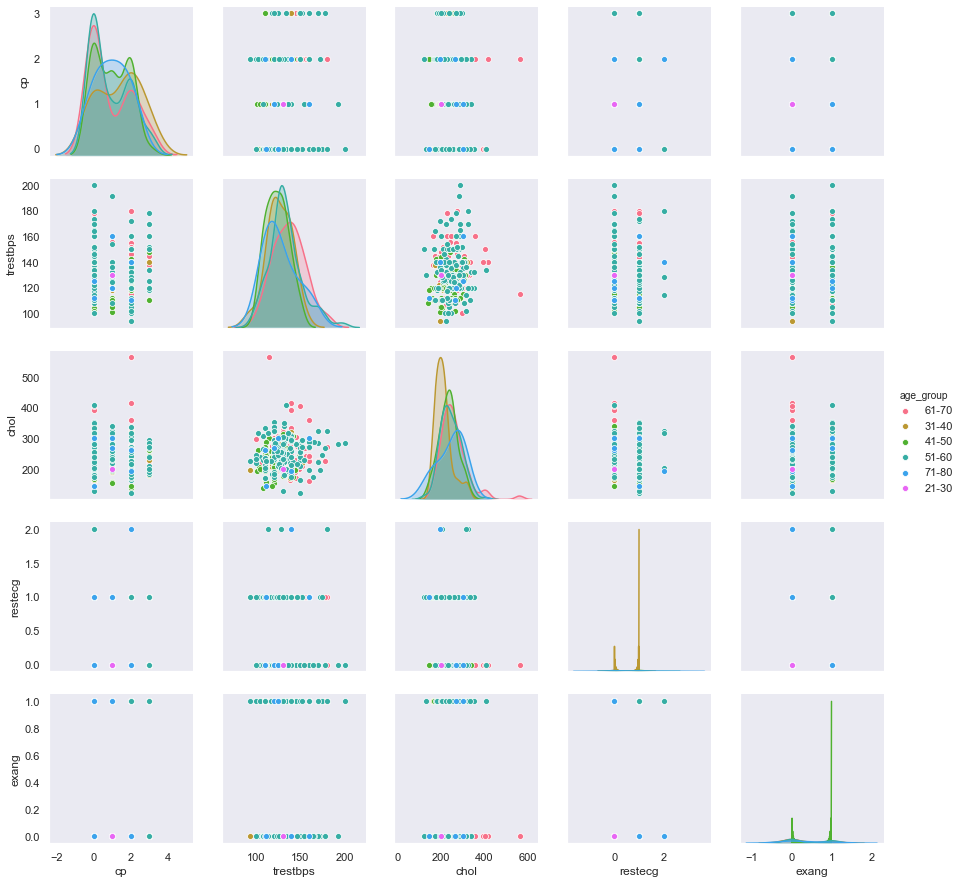

In [215]:
sns.pairplot(data = df_relation2 ,palette="husl", hue= "age_group")
plt.savefig('rela2_pp.png',format='png')
plt.show()

In [45]:
df_relation3 = heart_data[["gender", 'cp', 'trestbps', 'chol', 'restecg', 'exang']]
df_relation3.head()

,gender,cp,trestbps,chol,restecg,exang
0,male,3,145,233,0,0
1,male,2,130,250,1,0
2,female,1,130,204,0,0
3,male,1,120,236,1,0
4,female,0,120,354,1,1


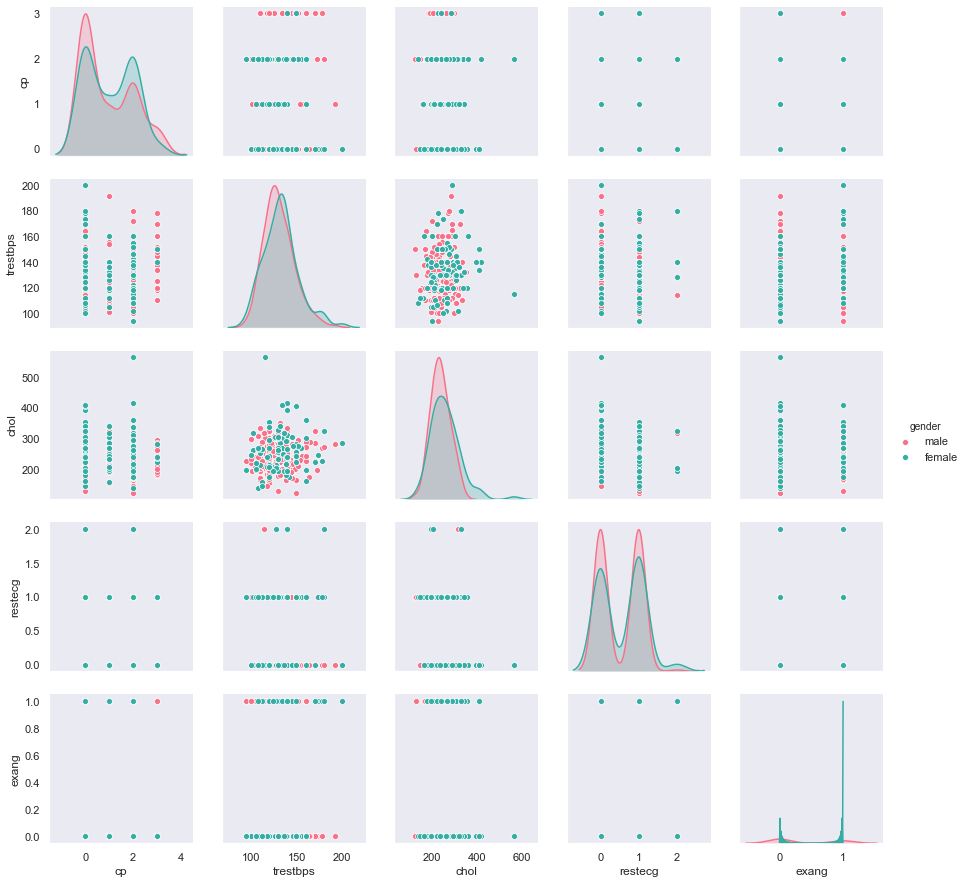

In [216]:
sns.pairplot(data = df_relation3 ,palette="husl", hue= "gender")
plt.savefig('rela3_pp.png',format='png')
plt.show()

In [47]:
df_relation4 = heart_data[["heart_disease", 'cp', 'trestbps', 'chol', 'restecg', 'exang']]
df_relation4.head()

,heart_disease,cp,trestbps,chol,restecg,exang
0,yes,3,145,233,0,0
1,yes,2,130,250,1,0
2,yes,1,130,204,0,0
3,yes,1,120,236,1,0
4,yes,0,120,354,1,1


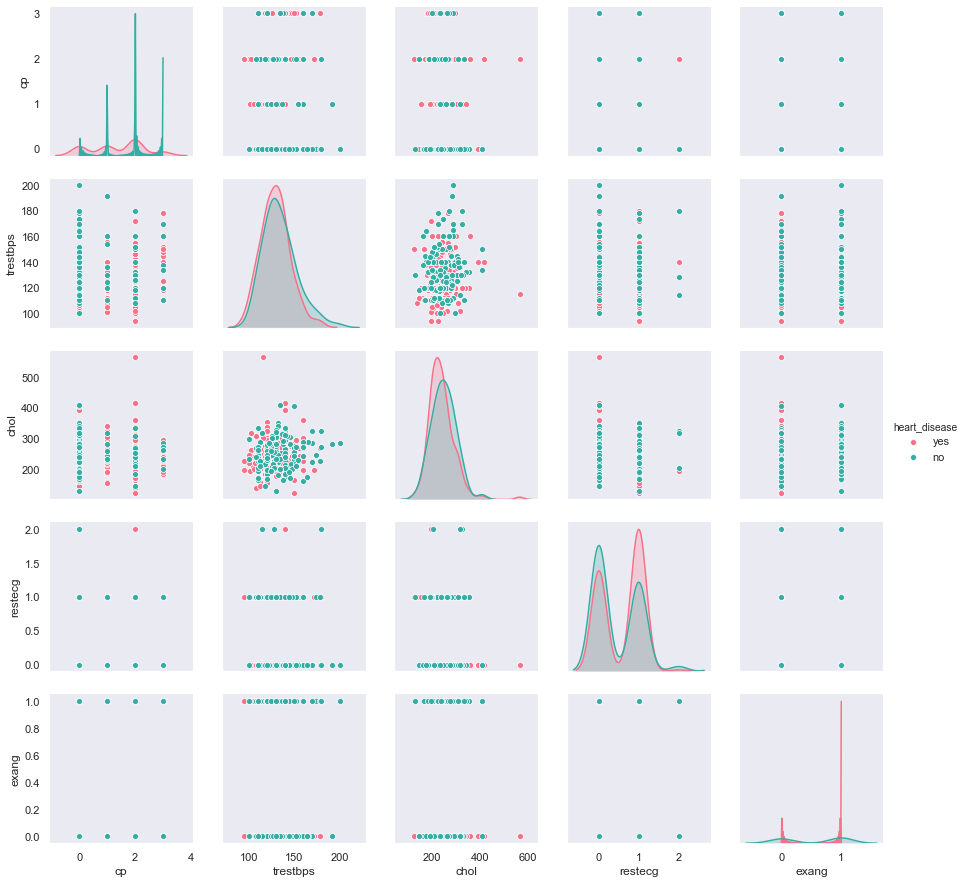

In [217]:
sns.pairplot(data = df_relation4 ,palette="husl", hue= "heart_disease")
plt.savefig('rela4_pp.png',format='png')
plt.show()

### <font color = orange> QUESTION4.  *What causes heart disease?* </font>
#### <font color = pink> *A machine learning approach* </font>

In [49]:
hr_type = heart_relation.dtypes
hr_type

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [50]:
model_data = heart_relation.drop(columns = ['target'])
model_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [51]:
label_data = heart_data[['heart_disease']]
label_data

,heart_disease
0,yes
1,yes
2,yes
3,yes
4,yes
...,...
298,no
299,no
300,no
301,no


In [178]:
#split the data in the ratio of 70-30 and randomization state =5
X_train, X_test, y_train, y_test = train_test_split(model_data, label_data, test_size = .3, random_state=5) 

In [179]:
# determine the size of the training and test data
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

212
91
212
91


In [180]:
# choose a classifier and fit the data into the model.
# Goal is to predict the data through the "heart_disease" variable as the label as to which category the data variables belong. 
# The predicted classes for heart_disease variable are will be "yes" and "no".
# Building the model, choosing the classifier and training the model with training data.
heart_disease_model = skens.RandomForestClassifier(max_depth=7,verbose=2)
heart_disease_model.fit(X_train, y_train)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=2, warm_start=False)

In [181]:
# Testing the model
predicted_labels = heart_disease_model.predict(X_test)
X_test['predicted_rf_type']=predicted_labels

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [182]:
print(predicted_labels)

['no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'yes' 'yes' 'yes' 'no' 'yes'
 'yes' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'yes'
 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'no' 'yes' 'yes' 'no'
 'no' 'yes' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes'
 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'yes' 'no' 'no' 'no' 'yes' 'yes' 'yes'
 'no' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'yes' 'yes'
 'yes' 'yes' 'no' 'yes' 'no' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'yes']


In [183]:
# Model Accuracy
accuracy = accuracy_score(y_test,predicted_labels)
print("Accuracy: {0:.2%})".format(accuracy))

Accuracy: 89.01%)


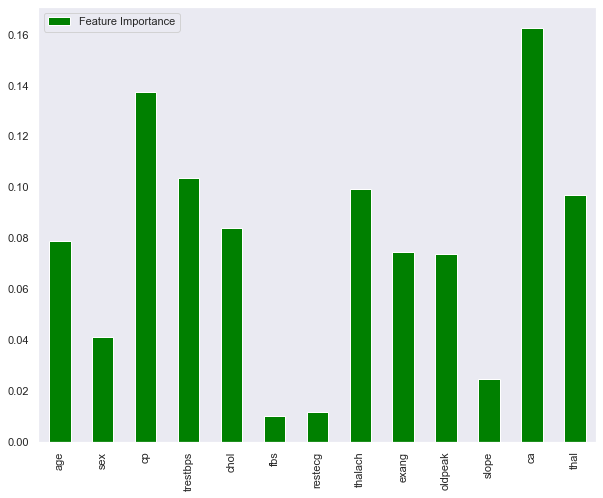

In [184]:
# Creating a bar plot for feature importance
feature_importance = heart_disease_model.feature_importances_
pd.DataFrame({'Feature Importance':feature_importance}, index = X_train.columns).plot(kind='bar', color = "green", figsize = (10,8))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


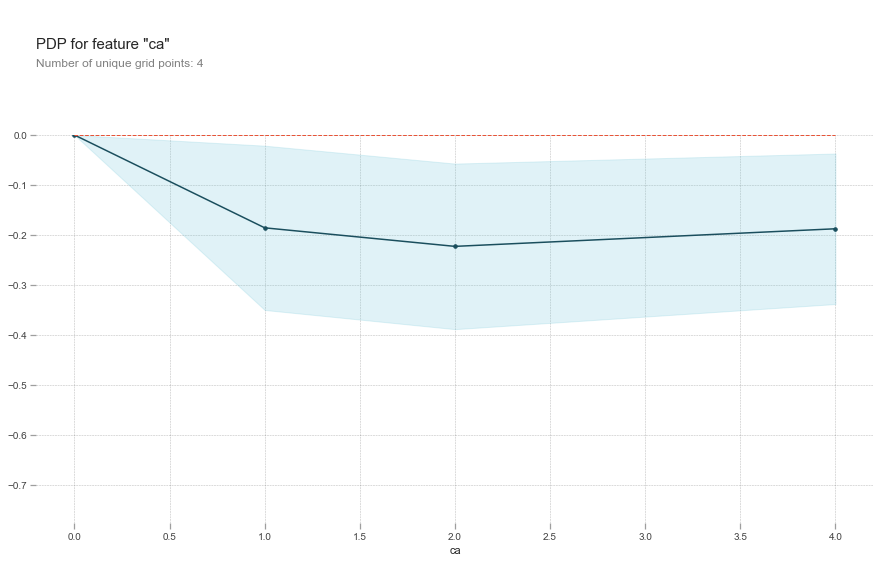

In [185]:
# referred: https://www.kaggle.com/tentotheminus9/what-causes-heart-disease-explaining-the-model
base_features = model_data.columns.values.tolist()

feat_name = 'ca'
pdp_dist = pdp.pdp_isolate(model=heart_disease_model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


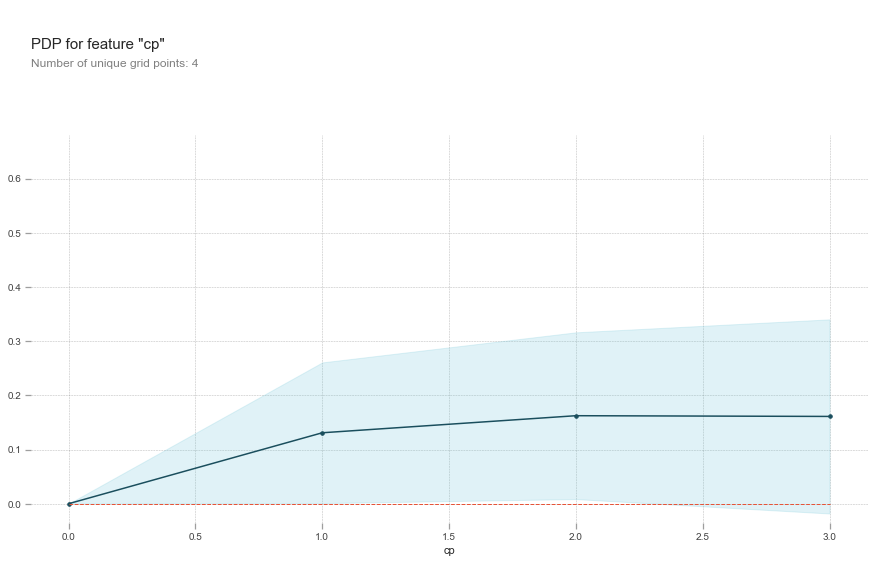

In [186]:
feat_name = 'cp'
pdp_dist = pdp.pdp_isolate(model=heart_disease_model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

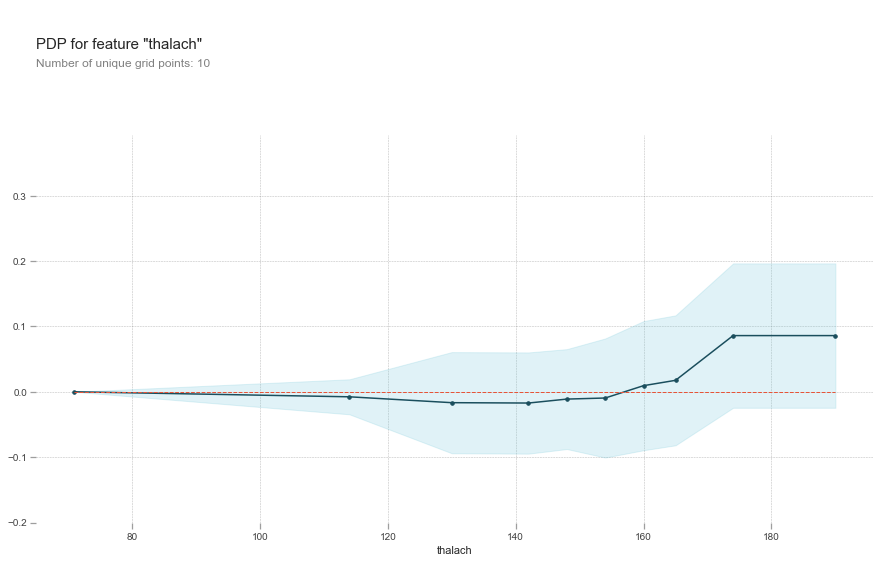

In [187]:
feat_name = 'thalach'
pdp_dist = pdp.pdp_isolate(model=heart_disease_model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

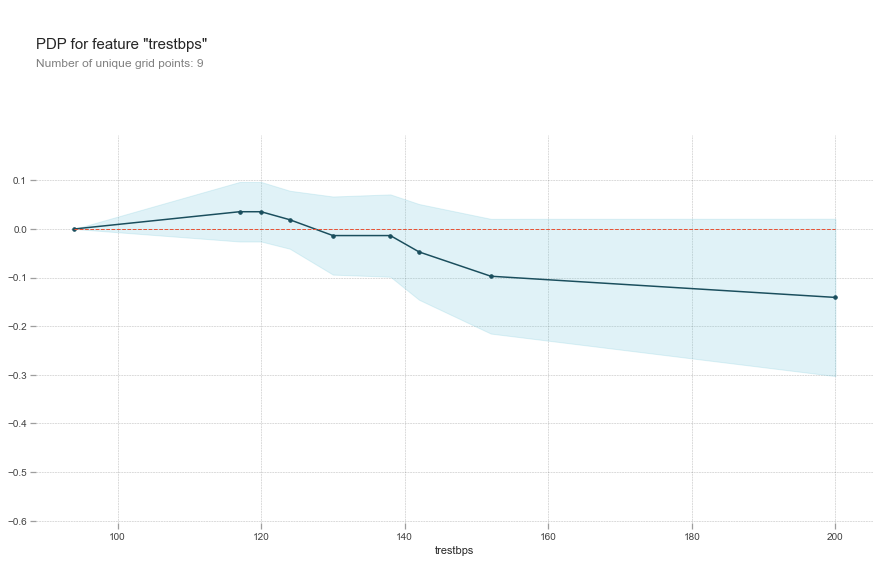

In [188]:
feat_name = 'trestbps'
pdp_dist = pdp.pdp_isolate(model=heart_disease_model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()